[Working File
](https://colab.research.google.com/drive/1xoZe3dusVXtQPE7kCXMm1q8K-K1CAoo2?usp=sharing) | Combine code from Ziva and Silvia | Rename Columns | Include Testing Algorithms

In [6]:
#imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from scipy.stats import pointbiserialr
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from matplotlib.patches import Patch


labelEncode = LabelEncoder();

In [7]:
#connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Point to dataset file and list data

# List files in Google Drive (optional to verify the dataset location)
# !ls "/content/drive/Shared drives/Project 6/"

# Copy the dataset to the current directory to load it
!cp "/content/drive/Shared drives/Project 6/dataset1.csv" .

# Load the dataset using pandas
import pandas as pd
raw = pd.read_csv('dataset1.csv')

# Display an overview of the dataset
print("Dataset Overview:")
raw

Dataset Overview:


,QKEY,INTERVIEW_START_W116,INTERVIEW_END_W116,DEVICE_TYPE_W116,LANG_W116,FORM_W116,XCITIZEN_W116,XW78NONRESP_W116,XW91NONRESP_W116,SATIS_W116,...,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_VOTED2020,F_VOTEGEN2020,F_INC_SDT1,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W116
0,100363,10/11/2022 19:14:45,10/11/2022 19:24:29,2,1,2,1,2,2,2,...,2,3,1,2,9,3,2,1,3,0.674073
1,100637,10/12/2022 10:36:37,10/12/2022 10:47:37,1,1,1,1,2,2,2,...,1,1,1,1,5,2,3,2,2,0.979139
2,101437,10/11/2022 23:05:48,10/11/2022 23:24:47,1,1,2,1,2,2,2,...,1,1,1,1,1,1,2,2,1,1.003828
3,101493,10/11/2022 16:08:14,10/12/2022 02:11:40,2,1,1,1,2,2,2,...,1,1,1,1,7,2,2,2,2,0.225660
4,102198,10/12/2022 20:41:45,10/12/2022 20:56:58,1,1,2,1,2,1,2,...,1,1,1,1,8,2,1,1,2,1.184498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5093,202201053655,10/13/2022 19:56:01,10/13/2022 20:14:04,2,1,1,1,1,1,2,...,2,4,2,,1,5,1,2,1,1.287961
5094,202201053919,10/11/2022 16:42:58,10/11/2022 17:07:23,2,1,2,1,1,1,2,...,2,3,1,2,2,3,2,2,2,0.762343
5095,202201054155,10/11/2022 15:32:52,10/11/2022 15:38:37,2,1,1,1,1,1,2,...,1,2,1,1,8,3,2,2,2,0.740969
5096,202201054180,10/14/2022 08:37:59,10/14/2022 08:53:31,2,1,2,1,1,1,1,...,2,3,1,2,6,3,2,1,3,0.545867




---

Task: Select and combine columns -> feat_select

Columns we have chosen
*   INSTN_CLGS_W116
*   INSTN_K12_W116
*   EMPLSIT_W116
*   WHADVANT_W116
*   ISSUECONG_ECON_W116
*   ISSUECONG_IMM_W116
*   F_VOTED2020










In [9]:
feat_select = pd.DataFrame(raw, columns=[                    #select features and save copy
    'ISSUECONG_ECON_W116',
    'ISSUECONG_IMM_W116',
    'EMPLSIT_W116',
    'INSTN_CLGS_W116',
    'INSTN_K12_W116',
    'WHADVANT_W116',
    'F_VOTED2020'
]).copy()

print("Selected Features:")
for column in feat_select.columns:
    print(column)

Selected Features:
ISSUECONG_ECON_W116
ISSUECONG_IMM_W116
EMPLSIT_W116
INSTN_CLGS_W116
INSTN_K12_W116
WHADVANT_W116
F_VOTED2020


In [10]:
feat_select

,ISSUECONG_ECON_W116,ISSUECONG_IMM_W116,EMPLSIT_W116,INSTN_CLGS_W116,INSTN_K12_W116,WHADVANT_W116,F_VOTED2020
0,1,2,2,2,1,3,1
1,1,1,3,2,99,3,1
2,1,1,4,2,2,4,1
3,1,1,5,2,2,2,1
4,1,3,2,2,1,2,1
...,...,...,...,...,...,...,...
5093,1,1,3,1,1,1,2
5094,1,2,3,1,1,4,1
5095,1,2,1,2,2,1,1
5096,1,1,1,1,1,1,1




---

Cleaning The Data

In [11]:
# Clean EMPLSIT_W116
feat_select['EMPLSIT_W116'] = feat_select['EMPLSIT_W116'].astype(str).replace("No Answer", "99").astype(int)
feat_select['EMPLSIT_W116'] = feat_select['EMPLSIT_W116'].replace(99, 3)  # Replace placeholder values with a valid option (e.g., mode)
feat_select['EMPLSIT_W116'] = 6 - feat_select['EMPLSIT_W116']  # Reverse the scale

In [12]:
#Clean ISSUECONG_ECON_W116 and ISSUECONG_IMM_W116
feat_select['ISSUECONG_ECON_W116'] = feat_select['ISSUECONG_ECON_W116'].fillna(3).replace(['99', ' '], '3')
feat_select['ISSUECONG_IMM_W116'] = feat_select['ISSUECONG_IMM_W116'].fillna(3).replace(['99', ' '], '3')

In [13]:
#Clean WHADVANT_W116 and INSTN_CLGS_W116/INSTN_K12_W116
feat_select['INSTN_CLGS_W116'] = feat_select['INSTN_CLGS_W116'].replace(99, "No Answer")
feat_select['INSTN_K12_W116'] = feat_select['INSTN_K12_W116'].replace(99, "No Answer")
feat_select['WHADVANT_W116'] = feat_select['WHADVANT_W116'].replace(99, 1)
feat_select['WHADVANT_W116'] = 5 - feat_select['WHADVANT_W116']  # Reverse scale

In [14]:
feat_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5098 entries, 0 to 5097
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISSUECONG_ECON_W116  5098 non-null   object
 1   ISSUECONG_IMM_W116   5098 non-null   object
 2   EMPLSIT_W116         5098 non-null   int64 
 3   INSTN_CLGS_W116      5098 non-null   object
 4   INSTN_K12_W116       5098 non-null   object
 5   WHADVANT_W116        5098 non-null   int64 
 6   F_VOTED2020          5098 non-null   object
dtypes: int64(2), object(5)
memory usage: 278.9+ KB


In [15]:
# Step 1: Drop rows where F_VOTED2020 is an empty space (' ')
feat_select = feat_select[feat_select['F_VOTED2020'] != ' '].copy()  # Create a new copy to avoid warnings
print("After dropping empty spaces:", feat_select['F_VOTED2020'].unique())

# Step 2: Create a new column F_VOTED2020_encoded and replace '99' with '2'
feat_select.loc[:, 'F_VOTED2020_encoded'] = feat_select['F_VOTED2020'].replace('99', '2')
print("After replacing '99' with '2':", feat_select['F_VOTED2020_encoded'].unique())

# Step 4: Combine categories 1 and 2 as 0 (did not vote), and keep 3 as 1 (voted)
feat_select.loc[:, 'F_VOTED2020_encoded'] = feat_select['F_VOTED2020_encoded'].replace({1: 0, 2: 0, 3: 1})
print("After combining categories:", feat_select['F_VOTED2020_encoded'].unique())

feat_select.loc[:, 'F_VOTED2020_encoded'] = pd.to_numeric(feat_select['F_VOTED2020_encoded'], errors='coerce')


# Step 3: Convert F_VOTED2020_encoded to integer type
feat_select.loc[:, 'F_VOTED2020_encoded'] = feat_select['F_VOTED2020_encoded'].astype(int)
print("After converting to integer:", feat_select['F_VOTED2020_encoded'].unique())


# Verify the cleaned column
print(feat_select['F_VOTED2020_encoded'].value_counts())


After dropping empty spaces: ['1' '2' '99']
After replacing '99' with '2': ['1' '2']
After combining categories: ['1' '2']
After converting to integer: [1 2]
F_VOTED2020_encoded
1    3991
2     830
Name: count, dtype: int64


In [16]:
# Replace dtype object to int or float

# Replace "No Answer" with a placeholder numeric value
feat_select['INSTN_CLGS_W116'] = feat_select['INSTN_CLGS_W116'].astype(str).replace("No Answer", "99").astype(int)
feat_select['INSTN_K12_W116'] = feat_select['INSTN_K12_W116'].astype(str).replace("No Answer", "99").astype(int)

# Replace object dType due to non-numerical characters (' ', "99", etc)
feat_select['EMPLSIT_W116'] = feat_select['EMPLSIT_W116'].astype(int)

In [17]:
# Map and encode features
whadvant_mapping = {
    1: "A great deal",
    2: "A fair amount",
    3: "Not too much",
    4: "Not at all",
    99: "No Answer"
}
emplsit_mapping = {
    1: "Work full time for pay",
    2: "Work part time for pay",
    3: "Not currently working for pay",
    4: "Unable to work due to a disability",
    5: "Retire"
}
instn_mapping = {
    1: "Positive Effect",
    2: "Negative Effect",
    99: "No Answer"
}
f_voted2020_mapping = {
    0: "Did not vote",
    1: "Voted"
}

In [18]:
# Apply mappings (dynamic)
mapped_whadvant = feat_select['WHADVANT_W116'].map(whadvant_mapping)
mapped_emplsit = feat_select['EMPLSIT_W116'].map(emplsit_mapping)
mapped_instn_clgs = feat_select['INSTN_CLGS_W116'].map(instn_mapping)
mapped_instn_k12 = feat_select['INSTN_K12_W116'].map(instn_mapping)
mapped_f_voted2020 = feat_select['F_VOTED2020'].map(f_voted2020_mapping)


In [19]:

from sklearn.preprocessing import OneHotEncoder
hotEncoder = OneHotEncoder(sparse_output=False)

# One-hot encoding for INSTN_CLGS_W116
INSTN_CLGS_W116_encoded = hotEncoder.fit_transform(feat_select[['INSTN_CLGS_W116']])
INSTN_CLGS_W116_encoded = pd.DataFrame(
    INSTN_CLGS_W116_encoded,
    columns=hotEncoder.get_feature_names_out(['INSTN_CLGS_W116'])
)
# One-hot encoding for INSTN_K12_W116
INSTN_K12_W116_encoded = hotEncoder.fit_transform(feat_select[['INSTN_K12_W116']])
INSTN_K12_W116_encoded = pd.DataFrame(
    INSTN_K12_W116_encoded,
    columns=hotEncoder.get_feature_names_out(['INSTN_K12_W116'])
)

# One-Hot Encoding for EMPLSIT_W116
EMPLSIT_W116_encoded = hotEncoder.fit_transform(feat_select[['EMPLSIT_W116']])
EMPLSIT_W116_encoded = pd.DataFrame(
    EMPLSIT_W116_encoded,
    columns=hotEncoder.get_feature_names_out(['EMPLSIT_W116'])
)

# One-Hot Encoding for WHADVANT_W116
WHADVANT_W116_encoded = hotEncoder.fit_transform(feat_select[['WHADVANT_W116']])
WHADVANT_W116_encoded = pd.DataFrame(
    WHADVANT_W116_encoded,
    columns=hotEncoder.get_feature_names_out(['WHADVANT_W116'])
)

In [20]:
#Convert remaining object features to numerical
feat_select['ISSUECONG_ECON_W116'] = pd.to_numeric(feat_select['ISSUECONG_ECON_W116'], errors='coerce')
feat_select['ISSUECONG_IMM_W116'] = pd.to_numeric(feat_select['ISSUECONG_IMM_W116'], errors='coerce')
feat_select['F_VOTED2020'] = pd.to_numeric(feat_select['F_VOTED2020'], errors='coerce')
feat_select = feat_select.dropna(subset=['F_VOTED2020']).copy()
feat_select['F_VOTED2020'] = feat_select['F_VOTED2020'].astype(int)


In [21]:
feat_select['F_VOTED2020_encoded'] = feat_select['F_VOTED2020_encoded'].replace({' ': None, '99': '2'})

In [22]:
feat_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4821 entries, 0 to 5097
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ISSUECONG_ECON_W116  4821 non-null   int64
 1   ISSUECONG_IMM_W116   4821 non-null   int64
 2   EMPLSIT_W116         4821 non-null   int64
 3   INSTN_CLGS_W116      4821 non-null   int64
 4   INSTN_K12_W116       4821 non-null   int64
 5   WHADVANT_W116        4821 non-null   int64
 6   F_VOTED2020          4821 non-null   int64
 7   F_VOTED2020_encoded  4821 non-null   int64
dtypes: int64(8)
memory usage: 339.0 KB


In [23]:
# Add all one-hot encoded features into the dataset
feat_select = pd.concat([
    feat_select,
    INSTN_CLGS_W116_encoded,
    INSTN_K12_W116_encoded,
    EMPLSIT_W116_encoded,
    WHADVANT_W116_encoded,
], axis=1)

In [24]:
feat_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5083 entries, 0 to 4816
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISSUECONG_ECON_W116  4821 non-null   float64
 1   ISSUECONG_IMM_W116   4821 non-null   float64
 2   EMPLSIT_W116         4821 non-null   float64
 3   INSTN_CLGS_W116      4821 non-null   float64
 4   INSTN_K12_W116       4821 non-null   float64
 5   WHADVANT_W116        4821 non-null   float64
 6   F_VOTED2020          4821 non-null   float64
 7   F_VOTED2020_encoded  4821 non-null   float64
 8   INSTN_CLGS_W116_1    4821 non-null   float64
 9   INSTN_CLGS_W116_2    4821 non-null   float64
 10  INSTN_CLGS_W116_99   4821 non-null   float64
 11  INSTN_K12_W116_1     4821 non-null   float64
 12  INSTN_K12_W116_2     4821 non-null   float64
 13  INSTN_K12_W116_99    4821 non-null   float64
 14  EMPLSIT_W116_1       4821 non-null   float64
 15  EMPLSIT_W116_2       4821 non-null   float6



---
F_Voted2020


<Axes: xlabel='F_VOTED2020_encoded'>

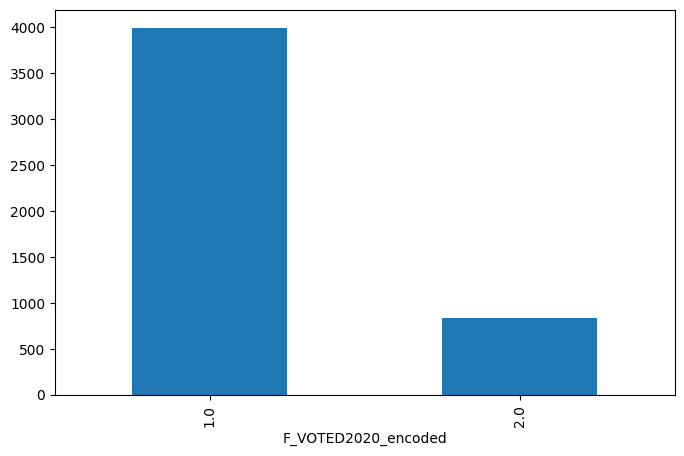

In [25]:
plt.figure(figsize=(8, 5))  #new figure for each plot
feat_select['F_VOTED2020_encoded'].value_counts().sort_index().plot(
        kind='bar')

#Graphs for Encoded Features

*   Importance of Economy
*   Importance of Immigration
*   White Advantage
*   Employment Status

In [26]:
feat_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5083 entries, 0 to 4816
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISSUECONG_ECON_W116  4821 non-null   float64
 1   ISSUECONG_IMM_W116   4821 non-null   float64
 2   EMPLSIT_W116         4821 non-null   float64
 3   INSTN_CLGS_W116      4821 non-null   float64
 4   INSTN_K12_W116       4821 non-null   float64
 5   WHADVANT_W116        4821 non-null   float64
 6   F_VOTED2020          4821 non-null   float64
 7   F_VOTED2020_encoded  4821 non-null   float64
 8   INSTN_CLGS_W116_1    4821 non-null   float64
 9   INSTN_CLGS_W116_2    4821 non-null   float64
 10  INSTN_CLGS_W116_99   4821 non-null   float64
 11  INSTN_K12_W116_1     4821 non-null   float64
 12  INSTN_K12_W116_2     4821 non-null   float64
 13  INSTN_K12_W116_99    4821 non-null   float64
 14  EMPLSIT_W116_1       4821 non-null   float64
 15  EMPLSIT_W116_2       4821 non-null   float6

In [27]:
#Removes the warning from output regarding future changes to Seaborn
#Add legend

def plot_encoded_distribution(data, title, x_label, y_label, palette, legend_labels=None):
    """
    Plot the distribution of encoded feature categories with individual colors for each bar.

    Parameters:
    - data: A pandas DataFrame containing 'Category' and 'Sum' columns.
    - title: Title of the plot.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    - palette: List of colors for individual bars.
    - legend_labels: List of labels for the legend (default is None).
    """
    # Create the bar plot with individual colors for each bar
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=data,
        x='Category',
        y='Sum',
        hue='Category',
        palette=palette  # Assign colors directly from the palette
    )
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add custom legend if provided
    if legend_labels:
        handles = [Patch(facecolor=palette[i], label=legend_labels[i]) for i in range(len(legend_labels))]
        plt.legend(handles=handles, loc='best', title="Legend")

    plt.show()

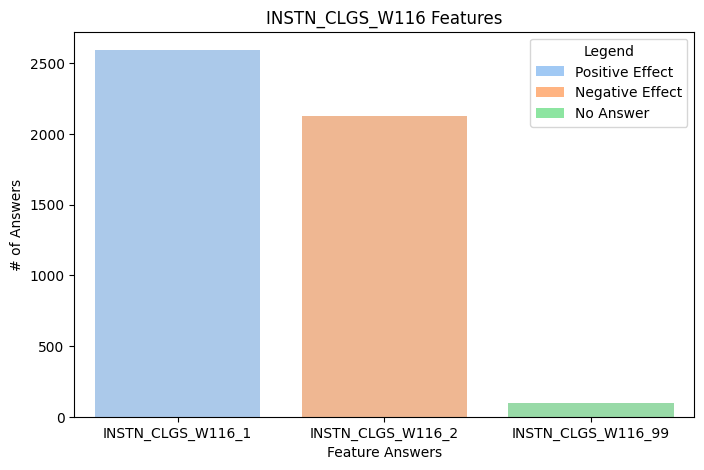

In [28]:
# Aggregated distribution for INSTN_CLGS_W116
encoded_instn_clgs = feat_select[['INSTN_CLGS_W116_1', 'INSTN_CLGS_W116_2', 'INSTN_CLGS_W116_99']]
encoded_instn_clgs_sum = encoded_instn_clgs.sum().reset_index()
encoded_instn_clgs_sum.columns = ['Category', 'Sum']

# Get pastel colors for the number of bars
pastel_palette = sns.color_palette("pastel", len(encoded_instn_clgs_sum))

plot_encoded_distribution(
    data=encoded_instn_clgs_sum,
    title="INSTN_CLGS_W116 Features",
    x_label="Feature Answers",
    y_label="# of Answers",
    palette=pastel_palette,  # Use pastel colors
    legend_labels=["Positive Effect", "Negative Effect", "No Answer"]  # Close parentheses here
)


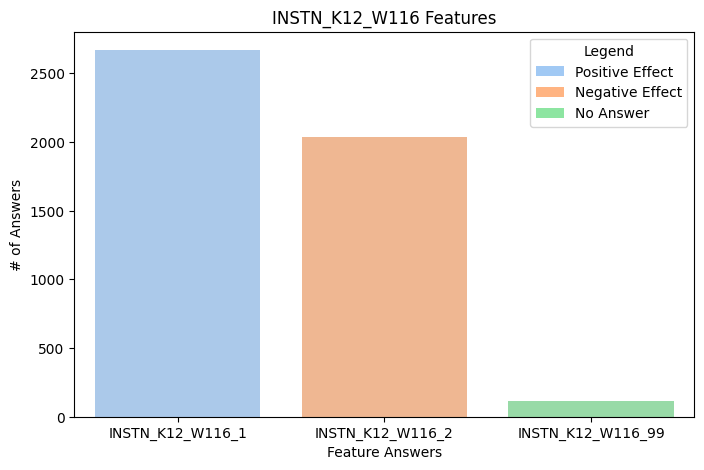

In [29]:
# Aggregated distribution for INSTN_K12_W116
encoded_instn_k12 = feat_select[['INSTN_K12_W116_1', 'INSTN_K12_W116_2', 'INSTN_K12_W116_99']]
encoded_instn_k12_sum = encoded_instn_k12.sum().reset_index()
encoded_instn_k12_sum.columns = ['Category', 'Sum']

# Get pastel colors for the number of bars
pastel_palette = sns.color_palette("pastel", len(encoded_instn_k12_sum))

plot_encoded_distribution(
    data=encoded_instn_k12_sum,
    title="INSTN_K12_W116 Features",
    x_label="Feature Answers",
    y_label="# of Answers",
    palette=pastel_palette,  # Use pastel colors
    legend_labels=["Positive Effect", "Negative Effect", "No Answer"]
)



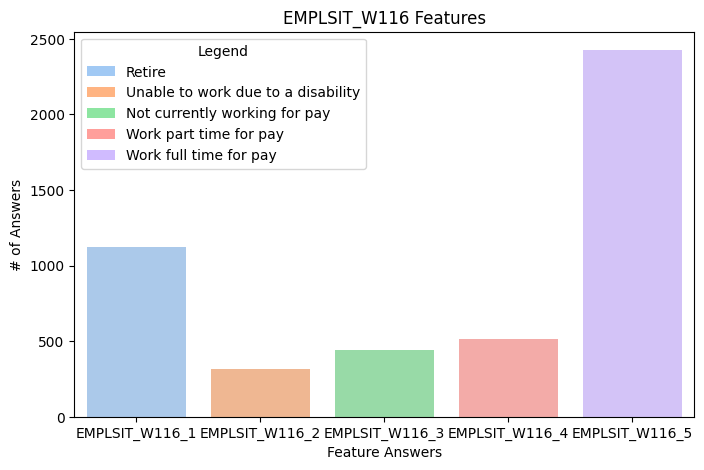

In [30]:
# Aggregated distribution for EMPLSIT_W116
encoded_emplsit = feat_select[['EMPLSIT_W116_1', 'EMPLSIT_W116_2', 'EMPLSIT_W116_3', 'EMPLSIT_W116_4', 'EMPLSIT_W116_5']]
encoded_emplsit_sum = encoded_emplsit.sum().reset_index()
encoded_emplsit_sum.columns = ['Category', 'Sum']

# Get pastel colors for the number of bars
pastel_palette = sns.color_palette("pastel", len(encoded_emplsit_sum))

plot_encoded_distribution(
    data=encoded_emplsit_sum,
    title="EMPLSIT_W116 Features",
    x_label="Feature Answers",
    y_label="# of Answers",
    palette=sns.color_palette("pastel", len(encoded_emplsit_sum)),  # Adjust colors dynamically
    legend_labels=[
        "Retire",
        "Unable to work due to a disability",
        "Not currently working for pay",
        "Work part time for pay",
        "Work full time for pay"
    ]
)


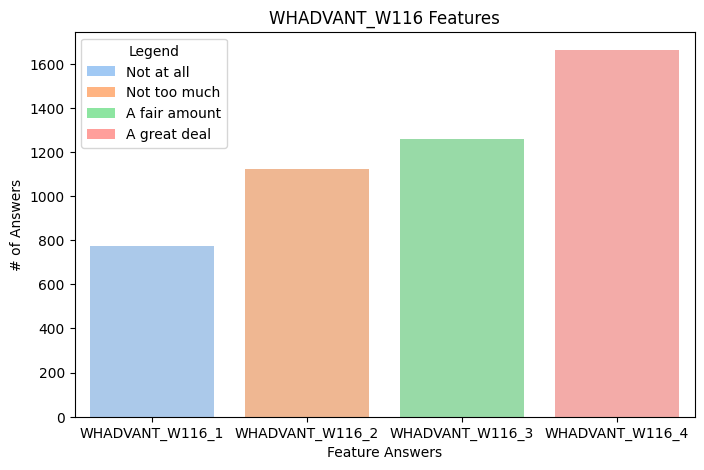

In [31]:
# Aggregated distribution for WHADVANT_W116
encoded_whadvant = feat_select[['WHADVANT_W116_1', 'WHADVANT_W116_2', 'WHADVANT_W116_3', 'WHADVANT_W116_4']]
encoded_whadvant_sum = encoded_whadvant.sum().reset_index()
encoded_whadvant_sum.columns = ['Category', 'Sum']

# Get pastel colors for the number of bars
pastel_palette = sns.color_palette("pastel", len(encoded_whadvant_sum))

plot_encoded_distribution(
    data=encoded_whadvant_sum,
    title="WHADVANT_W116 Features",
    x_label="Feature Answers",
    y_label="# of Answers",
    palette=pastel_palette,  # Use pastel colors
    legend_labels=[
        "Not at all",
        "Not too much",
        "A fair amount",
        "A great deal"
    ]
)



# Rename Columns For Improved Readability
Consists of the encoded features only | Original columns will retain their name

In [32]:
feat_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5083 entries, 0 to 4816
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISSUECONG_ECON_W116  4821 non-null   float64
 1   ISSUECONG_IMM_W116   4821 non-null   float64
 2   EMPLSIT_W116         4821 non-null   float64
 3   INSTN_CLGS_W116      4821 non-null   float64
 4   INSTN_K12_W116       4821 non-null   float64
 5   WHADVANT_W116        4821 non-null   float64
 6   F_VOTED2020          4821 non-null   float64
 7   F_VOTED2020_encoded  4821 non-null   float64
 8   INSTN_CLGS_W116_1    4821 non-null   float64
 9   INSTN_CLGS_W116_2    4821 non-null   float64
 10  INSTN_CLGS_W116_99   4821 non-null   float64
 11  INSTN_K12_W116_1     4821 non-null   float64
 12  INSTN_K12_W116_2     4821 non-null   float64
 13  INSTN_K12_W116_99    4821 non-null   float64
 14  EMPLSIT_W116_1       4821 non-null   float64
 15  EMPLSIT_W116_2       4821 non-null   float6

In [33]:
# Rename columns for readability (including both F_VOTED2020 versions)
feat_select = feat_select.rename(columns={
    # Original Features
    'ISSUECONG_ECON_W116': 'Importance of Economy',
    'ISSUECONG_IMM_W116': 'Importance of Immigration',
    'EMPLSIT_W116': 'Employment Status',
    'INSTN_CLGS_W116': 'College Effect',
    'INSTN_K12_W116': 'K12 Effect',
    'WHADVANT_W116': 'White Advantage',
    'F_VOTED2020': 'Original Voted in 2020',
    'F_VOTED2020_encoded': 'Voted in 2020',

    # Encoded Features
    'INSTN_CLGS_W116_1': 'College Positive Effect',
    'INSTN_CLGS_W116_2': 'College Negative Effect',
    'INSTN_CLGS_W116_99': 'College No Answer',
    'INSTN_K12_W116_1': 'K12 Positive Effect',
    'INSTN_K12_W116_2': 'K12 Negative Effect',
    'INSTN_K12_W116_99': 'K12 No Answer',
    'EMPLSIT_W116_1': 'Employment: Retired',
    'EMPLSIT_W116_2': 'Employment: Unable to Work',
    'EMPLSIT_W116_3': 'Employment: Not Working',
    'EMPLSIT_W116_4': 'Employment: Part-Time',
    'EMPLSIT_W116_5': 'Employment: Full-Time',
    'WHADVANT_W116_1': 'White Advantage: Not at All',
    'WHADVANT_W116_2': 'White Advantage: Not Too Much',
    'WHADVANT_W116_3': 'White Advantage: Fair Amount',
    'WHADVANT_W116_4': 'White Advantage: Great Deal'
}, inplace=False)

# Verify the renamed columns
print(feat_select.info())


<class 'pandas.core.frame.DataFrame'>
Index: 5083 entries, 0 to 4816
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Importance of Economy          4821 non-null   float64
 1   Importance of Immigration      4821 non-null   float64
 2   Employment Status              4821 non-null   float64
 3   College Effect                 4821 non-null   float64
 4   K12 Effect                     4821 non-null   float64
 5   White Advantage                4821 non-null   float64
 6   Original Voted in 2020         4821 non-null   float64
 7   Voted in 2020                  4821 non-null   float64
 8   College Positive Effect        4821 non-null   float64
 9   College Negative Effect        4821 non-null   float64
 10  College No Answer              4821 non-null   float64
 11  K12 Positive Effect            4821 non-null   float64
 12  K12 Negative Effect            4821 non-null   float6

In [34]:
#Make new feat_select_encoded to omit 5 original features from correlation findings
# List of readable feature names to drop
features_to_drop = [
    'K12 Effect',
    'College Effect',
    'Employment Status',
    'White Advantage',
    'Original Voted in 2020'
]

# Create a new DataFrame excluding the original features
feat_select_encoded = feat_select.drop(columns=features_to_drop)

feat_select_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5083 entries, 0 to 4816
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Importance of Economy          4821 non-null   float64
 1   Importance of Immigration      4821 non-null   float64
 2   Voted in 2020                  4821 non-null   float64
 3   College Positive Effect        4821 non-null   float64
 4   College Negative Effect        4821 non-null   float64
 5   College No Answer              4821 non-null   float64
 6   K12 Positive Effect            4821 non-null   float64
 7   K12 Negative Effect            4821 non-null   float64
 8   K12 No Answer                  4821 non-null   float64
 9   Employment: Retired            4821 non-null   float64
 10  Employment: Unable to Work     4821 non-null   float64
 11  Employment: Not Working        4821 non-null   float64
 12  Employment: Part-Time          4821 non-null   float6

# Startifying Label
Strat F_VOTED2020 to ensure the model distributes this evenly

-Training Set (78% voters, 14% non-voters, etc.):
    The model will see training data that reflects the actual class distribution, helping it learn patterns that apply to the full dataset.

-Test Set (similar distribution):
    The test set will also represent the real-world distribution, so when you evaluate your model, you’ll get realistic performance metrics.


In [35]:
# Step 1: Drop rows where 'Voted in 2020' contains NaN values
feat_select = feat_select.dropna(subset=['Voted in 2020']).copy()

# Step 2: Reset the index of the DataFrame
feat_select.reset_index(drop=True, inplace=True)

# Step 3: Use the encoded DataFrame and ensure correct column names
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Step 4: Stratify based on 'Voted in 2020'
for train_index, test_index in split.split(feat_select, feat_select["Voted in 2020"]):
    strat_train_set = feat_select.loc[train_index]
    strat_test_set = feat_select.loc[test_index]

print("Training Set Distribution:")
print(strat_train_set["Voted in 2020"].value_counts(normalize=True))

print("Test Set Distribution:")
print(strat_test_set["Voted in 2020"].value_counts(normalize=True))


Training Set Distribution:
Voted in 2020
1.0    0.827801
2.0    0.172199
Name: proportion, dtype: float64
Test Set Distribution:
Voted in 2020
1.0    0.827979
2.0    0.172021
Name: proportion, dtype: float64


In [36]:
# Define the proportion function
def voted_cat_proportions(data):
    # Use the correct, renamed column: 'Voted in 2020'
    return data["Voted in 2020"].value_counts() / len(data)

# Perform a stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Create stratified train and test sets, use 'Voted in 2020' and the original dataframe (feat_select)
for train_idx, test_idx in split.split(feat_select, feat_select["Voted in 2020"]):
    # Select only the encoded features for the training and test sets
    strat_train_set = feat_select_encoded.loc[train_idx]
    strat_test_set = feat_select_encoded.loc[test_idx]

# Perform a random split for comparison
train_set, test_set = train_test_split(feat_select_encoded, test_size=0.2, random_state=42)

# Create a comparison DataFrame
compare_props = pd.DataFrame({
    "Overall": voted_cat_proportions(feat_select),  # Use original dataframe to calculate overall proportions
    "Stratified": voted_cat_proportions(strat_test_set),  # Proportions from the stratified split
    "Random": voted_cat_proportions(test_set)  # Proportions from the random split
}).sort_index()

# Calculate percentage errors
compare_props["Random %error"] = 100 * (compare_props["Random"] / compare_props["Overall"] - 1)
compare_props["Stratified %error"] = 100 * (compare_props["Stratified"] / compare_props["Overall"] - 1)

compare_props

,Overall,Stratified,Random,Random %error,Stratified %error
Voted in 2020,,,,,
1.0,0.827837,0.780311,0.814159,-1.652169,-5.740948
2.0,0.172163,0.161658,0.133727,-22.325763,-6.102004


Why Stratified is Ideal:

    -Stratified sampling ensures that every class in F_VOTED2020 is proportionally represented in both training and test sets, even for rare -classes like 99.
    This leads to a more representative test set and fair evaluation of the model.




---
Dont allow grouped one-hot encoded columns to compare to one another


In [37]:
one_hot_groups = {
    "College Effect": ['College Positive Effect', 'College Negative Effect', 'College No Answer'],
    "K12 Effect": ['K12 Positive Effect', 'K12 Negative Effect', 'K12 No Answer'],
    "Employment Status": ['Employment: Retired', 'Employment: Unable to Work', 'Employment: Not Working', 'Employment: Part-Time', 'Employment: Full-Time'],
    "White Advantage": ['White Advantage: Not at All', 'White Advantage: Not Too Much', 'White Advantage: Fair Amount', 'White Advantage: Great Deal']
}


In [38]:
mask = pd.DataFrame(0, index=feat_select_encoded.columns, columns=feat_select_encoded.columns, dtype=bool)

for group in one_hot_groups.values():
    for col1 in group:
        for col2 in group:
            if col1 != col2:
                mask.at[col1, col2] = True
                mask.at[col2, col1] = True  # Symmetric masking


In [39]:
# Select only numeric columns
numeric_columns = feat_select_encoded.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()


In [40]:
print("Columns included in correlation calculation:")
print(numeric_columns.columns.tolist())


Columns included in correlation calculation:
['Importance of Economy', 'Importance of Immigration', 'Voted in 2020', 'College Positive Effect', 'College Negative Effect', 'College No Answer', 'K12 Positive Effect', 'K12 Negative Effect', 'K12 No Answer', 'Employment: Retired', 'Employment: Unable to Work', 'Employment: Not Working', 'Employment: Part-Time', 'Employment: Full-Time', 'White Advantage: Not at All', 'White Advantage: Not Too Much', 'White Advantage: Fair Amount', 'White Advantage: Great Deal']


---
Correlation | List of Top Correlations


In [41]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Assuming feat_select_encoded contains all the features including one-hot encoded features
# Compute the correlation matrix for all features
corr_matrix = feat_select_encoded.corr()

# Create a DataFrame from the correlation matrix
corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        feature_1 = corr_matrix.columns[i]
        feature_2 = corr_matrix.columns[j]
        correlation = corr_matrix.iloc[i, j]
        corr_pairs.append((feature_1, feature_2, correlation))

# Create a DataFrame of correlation pairs
sorted_corr_values = pd.DataFrame(corr_pairs, columns=["Feature1", "Feature2", "Correlation"])

# Sort by absolute correlation in descending order
sorted_corr_values = sorted_corr_values.sort_values(by="Correlation", key=abs, ascending=False)

# Define groups of one-hot encoded features to avoid comparing within groups
groups = {
    "College": ["College Positive Effect", "College Negative Effect", "College No Answer"],
    "K12": ["K12 Positive Effect", "K12 Negative Effect", "K12 No Answer"],
    "Employment": [
        "Employment: Retired",
        "Employment: Unable to Work",
        "Employment: Not Working",
        "Employment: Part-Time",
        "Employment: Full-Time",
    ],
    "White Advantage": [
        "White Advantage: Not at All",
        "White Advantage: Not Too Much",
        "White Advantage: Fair Amount",
        "White Advantage: Great Deal",
    ],
}

# Create a set of invalid pairs (comparisons within the same group)
invalid_pairs = set()
for group, features in groups.items():
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            invalid_pairs.add((features[i], features[j]))
            invalid_pairs.add((features[j], features[i]))  # Add reverse pair for symmetry

# Remove invalid pairs from the sorted correlation values
filtered_corr_values = sorted_corr_values[
    ~sorted_corr_values[["Feature1", "Feature2"]].apply(tuple, axis=1).isin(invalid_pairs)
]

# Filter to show only positive correlations
filtered_corr_values_positive = filtered_corr_values[filtered_corr_values["Correlation"] > 0]

# Sort values by correlation in descending order
filtered_corr_values_positive = filtered_corr_values_positive.sort_values(by="Correlation", ascending=False)

# Display all positive correlations
print("All Positive Correlations (after filtering within groups):")
print(tabulate(filtered_corr_values_positive, headers="keys", tablefmt="fancy_grid"))


All Positive Correlations (after filtering within groups):
╒═════╤════════════════════════════╤═══════════════════════════════╤═══════════════╕
│     │ Feature1                   │ Feature2                      │   Correlation │
╞═════╪════════════════════════════╪═══════════════════════════════╪═══════════════╡
│  50 │ College Positive Effect    │ K12 Positive Effect           │   0.584971    │
├─────┼────────────────────────────┼───────────────────────────────┼───────────────┤
│  64 │ College Negative Effect    │ K12 Negative Effect           │   0.580406    │
├─────┼────────────────────────────┼───────────────────────────────┼───────────────┤
│  77 │ College No Answer          │ K12 No Answer                 │   0.572893    │
├─────┼────────────────────────────┼───────────────────────────────┼───────────────┤
│   0 │ Importance of Economy      │ Importance of Immigration     │   0.381305    │
├─────┼────────────────────────────┼───────────────────────────────┼───────────────┤
│  61 



---

Heat Map to Visualize Correlations

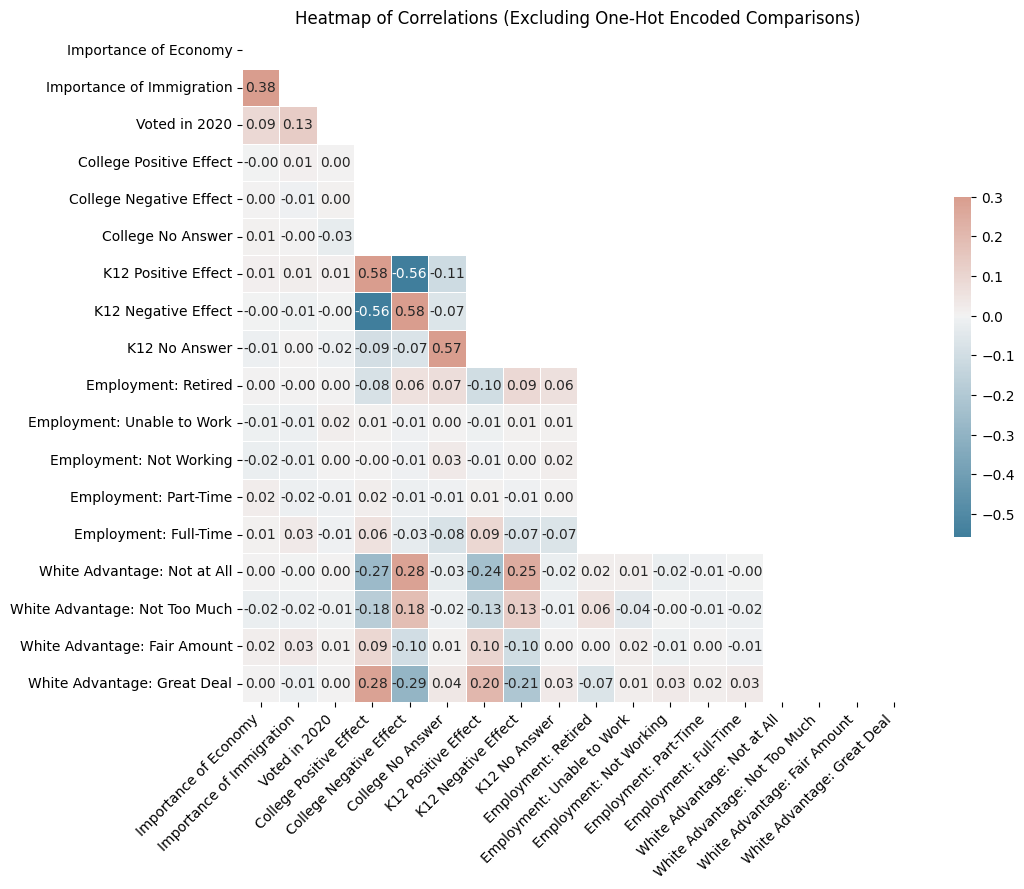

In [42]:
# Step 1: Calculate the correlation matrix for the dataset
corr = feat_select_encoded.corr()

# Step 2: Create a mask for the upper triangle to avoid duplicate correlations
mask = np.triu(np.ones_like(corr, dtype=bool))

# Step 3: Define groups of one-hot encoded features
groups = {
    "College": ["College Positive Effect", "College Negative Effect", "College No Answer"],
    "K12": ["K12 Positive Effect", "K12 Negative Effect", "K12 No Answer"],
    "Employment": [
        "Employment: Retired",
        "Employment: Unable to Work",
        "Employment: Not Working",
        "Employment: Part-Time",
        "Employment: Full-Time",
    ],
    "White Advantage": [
        "White Advantage: Not at All",
        "White Advantage: Not Too Much",
        "White Advantage: Fair Amount",
        "White Advantage: Great Deal",
    ],
}

# Step 4: Create a set of invalid pairs (comparisons within the same group)
invalid_pairs = set()
for group, features in groups.items():
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            invalid_pairs.add((features[i], features[j]))
            invalid_pairs.add((features[j], features[i]))  # Add reverse pair for symmetry

# Step 5: Create a mask for the invalid pairs
mask_invalid = np.zeros_like(corr, dtype=bool)

# Get feature names from the correlation matrix
features = list(corr.columns)

for (feature1, feature2) in invalid_pairs:
    if feature1 in features and feature2 in features:
        idx1, idx2 = features.index(feature1), features.index(feature2)
        mask_invalid[idx1, idx2] = True
        mask_invalid[idx2, idx1] = True

# Step 6: Combine upper triangle mask with the invalid mask
combined_mask = mask | mask_invalid

# Step 7: Create the heatmap
f, ax = plt.subplots(figsize=(11, 9))  # Adjust figure size for better readability
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=combined_mask,  # Apply the combined mask
    cmap=cmap,
    vmax=0.3,  # Limit maximum value of the color bar
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.5}
)

plt.title("Heatmap of Correlations (Excluding One-Hot Encoded Comparisons)")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to fit everything well
plt.show()



---
# Models




# Linear Regression

In [43]:
feat_select_encoded = feat_select_encoded.dropna().copy()


## **Logistic Regression**
### Task: link explanation to a doc

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
# Step 1: Prepare the data
X = feat_select_encoded.drop(columns=["Voted in 2020"])  # Features
y = feat_select_encoded["Voted in 2020"]  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a logistic regression model with class weighting
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = log_reg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(tabulate(cm, headers=["Predicted 0", "Predicted 1"], tablefmt="fancy_grid"))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=2))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.2%}")


Confusion Matrix:
╒═══════════════╤═══════════════╕
│   Predicted 0 │   Predicted 1 │
╞═══════════════╪═══════════════╡
│           417 │           344 │
├───────────────┼───────────────┤
│            68 │            83 │
╘═══════════════╧═══════════════╛

Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.55      0.67       761
         2.0       0.19      0.55      0.29       151

    accuracy                           0.55       912
   macro avg       0.53      0.55      0.48       912
weighted avg       0.75      0.55      0.61       912


Accuracy Score: 54.82%




---

# Random Forest
Link analysis

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(tabulate(cm, headers=["Predicted 0", "Predicted 1"], tablefmt="fancy_grid"))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, digits=2))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy Score: {accuracy:.2%}")



Confusion Matrix:
╒═══════════════╤═══════════════╕
│   Predicted 0 │   Predicted 1 │
╞═══════════════╪═══════════════╡
│           561 │           200 │
├───────────────┼───────────────┤
│           107 │            44 │
╘═══════════════╧═══════════════╛

Classification Report:
              precision    recall  f1-score   support

         1.0       0.84      0.74      0.79       761
         2.0       0.18      0.29      0.22       151

    accuracy                           0.66       912
   macro avg       0.51      0.51      0.50       912
weighted avg       0.73      0.66      0.69       912


Accuracy Score: 66.34%




---

# Support Vector Machine SVM
add results analysis doc

In [48]:
from sklearn.svm import SVC

In [49]:
# Train an SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:")
print(tabulate(cm, headers=["Predicted 0", "Predicted 1"], tablefmt="fancy_grid"))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, digits=2))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nAccuracy Score: {accuracy:.2%}")



Confusion Matrix:
╒═══════════════╤═══════════════╕
│   Predicted 0 │   Predicted 1 │
╞═══════════════╪═══════════════╡
│           574 │           187 │
├───────────────┼───────────────┤
│           106 │            45 │
╘═══════════════╧═══════════════╛

Classification Report:
              precision    recall  f1-score   support

         1.0       0.84      0.75      0.80       761
         2.0       0.19      0.30      0.23       151

    accuracy                           0.68       912
   macro avg       0.52      0.53      0.52       912
weighted avg       0.74      0.68      0.70       912


Accuracy Score: 67.87%




---
# Gradient Boosting with XGBoost
add result analysis

In [50]:
from xgboost import XGBClassifier

# Map the target variable
y_train = y_train.map({1: 0, 2: 1})
y_test = y_test.map({1: 0, 2: 1})


In [51]:
# Train an XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:")
print(tabulate(cm, headers=["Predicted 0", "Predicted 1"], tablefmt="fancy_grid"))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, digits=2))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"\nAccuracy Score: {accuracy:.2%}")



Confusion Matrix:
╒═══════════════╤═══════════════╕
│   Predicted 0 │   Predicted 1 │
╞═══════════════╪═══════════════╡
│           505 │           256 │
├───────────────┼───────────────┤
│            96 │            55 │
╘═══════════════╧═══════════════╛

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.66      0.74       761
           1       0.18      0.36      0.24       151

    accuracy                           0.61       912
   macro avg       0.51      0.51      0.49       912
weighted avg       0.73      0.61      0.66       912


Accuracy Score: 61.40%




---
#Gradient Boosting with LightGBM
add analysis doc


In [52]:
from lightgbm import LGBMClassifier

In [53]:
# Clean feature names to make them LightGBM-compatible
X_train.columns = X_train.columns.str.replace(r'[^\w]', '_', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^\w]', '_', regex=True)

# Train the LightGBM model
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred_lgbm)
cm_table = [
    ["", "Predicted 0", "Predicted 1"],
    ["True 0 (TN)", cm[0, 0], cm[0, 1]],
    ["True 1 (FN)", cm[1, 0], cm[1, 1]]
]
print("\nConfusion Matrix with Labels:")
print(tabulate(cm_table, headers="firstrow", tablefmt="grid"))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm, digits=2))

accuracy = accuracy_score(y_test, y_pred_lgbm) * 100
print(f"\nAccuracy Score: {accuracy:.2f}%")


[LightGBM] [Info] Number of positive: 619, number of negative: 3028
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 3647, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

Confusion Matrix with Labels:
+-------------+---------------+---------------+
|             |   Predicted 0 |   Predicted 1 |
+=============+===============+===============+
| True 0 (TN) |           511 |           250 |
+-------------+---------------+---------------+
| True 1 (FN) |            85 |            66 |
+-------------+---------------+---------------+

Classification Report:
              precision    recall  f1-score   support

    

In [54]:
#attempt to run auto ml

In [55]:
pip install arcgis


In [57]:
!pip install tpot
from tpot import TPOTClassifier

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 12.0 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=90b8787c3994242993635d93e5d1e3fbec956e20b37f1a730a3a461e9798c245
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [60]:
 #Assuming feat_select_encoded is your dataset
X = feat_select_encoded.drop(columns=["Voted in 2020"])
y = feat_select_encoded["Voted in 2020"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Evaluate the model
score = tpot.score(X_test, y_test)
print(f"TPOT Model Accuracy: {score:.2%}")

# Export the best model pipeline found
tpot.export('best_pipeline.py')


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.83109457504181

Generation 2 - Current best internal CV score: 0.8316425202472895

Generation 3 - Current best internal CV score: 0.8319168686697861

Generation 4 - Current best internal CV score: 0.8321904654527689

Generation 5 - Current best internal CV score: 0.8327399139372756

Best pipeline: RandomForestClassifier(GaussianNB(input_matrix), bootstrap=True, criterion=gini, max_features=0.5, min_samples_leaf=16, min_samples_split=19, n_estimators=100)
TPOT Model Accuracy: 83.66%
